## Analisis Descriptivo de la Información

Con base en las bases de datos que se van a utilizar para dar el desarrollo a este proyecto proveniente de CEDE y el DANE se procede a realizar un análisis descriptivo de la misma para detectar patrones en el comportamiento. En el archivo de Proyecto se pocedera a realizar el preprocesamiento de datos corrigiendo errores dentro de las bases para evitar conclusiones erroneas.

In [17]:
## Carga de Librearias usadas en el análisis descriptivo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

## Se define el fondo de las gráficas
fig = plt.gcf()
fig.patch.set_facecolor('white')

<Figure size 432x288 with 0 Axes>

### Base de Datos Homicidios de CEDE

In [2]:
## Se carga la data que se encuentra disponible en la carpeta del proyecto comenzando por la relacionada con los Homicidios
df = pd.read_stata(r'..\data\Homicidios_2003-Ag2017.dta')

## Se carga la ruta para grabar las graficas generadas
directorio_actual = os.getcwd()
ruta_base = 'c:\\Users\\Felipe\\Documents\\GitHub\\Proyecto_Final_Aprend_Sup_g17\\docs\\images'


In [4]:
## Se verifica su estructura
df.shape

(221538, 9)

Como se puede observar la base de datos de Homicidios esta compuesta por 221.538 filas y 9 campos

In [5]:
## Se verifica como esta compuesta de forma general
df.head(5)

,Departamento,Municipio,coddepto,codmpio,fecha,genero,edad,grupo_edad,n_homicidios
0,Antioquia,Medellín,5,5001.0,2003-01-01,MASCULINO,27.0,ADULTOS,1.0
1,Antioquia,Medellín,5,5001.0,2003-01-01,FEMENINO,19.0,ADULTOS,1.0
2,Antioquia,Medellín,5,5001.0,2003-01-01,MASCULINO,18.0,ADULTOS,2.0
3,Antioquia,Medellín,5,5001.0,2003-01-01,MASCULINO,43.0,ADULTOS,1.0
4,Antioquia,Medellín,5,5001.0,2003-01-01,MASCULINO,28.0,ADULTOS,1.0


In [6]:
## Se revisan como se encuentran grabadas las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221538 entries, 0 to 221537
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Departamento  221538 non-null  object        
 1   Municipio     221538 non-null  object        
 2   coddepto      221538 non-null  int8          
 3   codmpio       221538 non-null  float64       
 4   fecha         221538 non-null  datetime64[ns]
 5   genero        221538 non-null  category      
 6   edad          219344 non-null  float64       
 7   grupo_edad    221538 non-null  category      
 8   n_homicidios  221538 non-null  float32       
dtypes: category(2), datetime64[ns](1), float32(1), float64(2), int8(1), object(2)
memory usage: 11.6+ MB


Como se puede observar la información almacenada en la base de datos no presenta valores nulos.

In [7]:
# Se verifica que la columna fecha este grabada como fecha en el df
df['fecha'] = pd.to_datetime(df['fecha'])

# Obtiene el directorio actual de trabajo
directorio_actual = os.getcwd()

# Construye la ruta completa al archivo PNG
ruta_archivo = 'c:\\Users\\Felipe\\Documents\\GitHub\\Proyecto_Final_Aprend_Sup_g17\\docs\\images'

# Guarda el gráfico como archivo PNG en la ruta especificada
plt.savefig(ruta_archivo)

<Figure size 432x288 with 0 Axes>

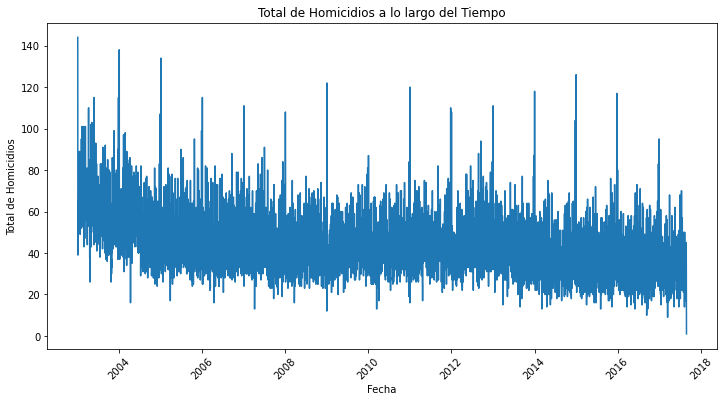

In [8]:
# Se agrupan el número de homicidios por fecha
homicidios_por_fecha = df.groupby('fecha')['n_homicidios'].sum().reset_index()

# Se gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='n_homicidios', data=homicidios_por_fecha)
plt.title('Total de Homicidios a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total de Homicidios')
plt.xticks(rotation=45)
nombre_archivo = 'Total de Homicidios a lo largo del Tiempo'
ruta_archivo = os.path.join(ruta_base, nombre_archivo)
plt.savefig(ruta_archivo, facecolor='white')

Con la gráfica anterior se realiza un analisis general del comportamiento de los homicidios a lo largo del tiempo. Como se puede identificar parace existir una tendencia a la disminución de los mismos pero con el objetivo de estar seguros de este análisis se procede a verificar a través del uso de la librería de statsmodel

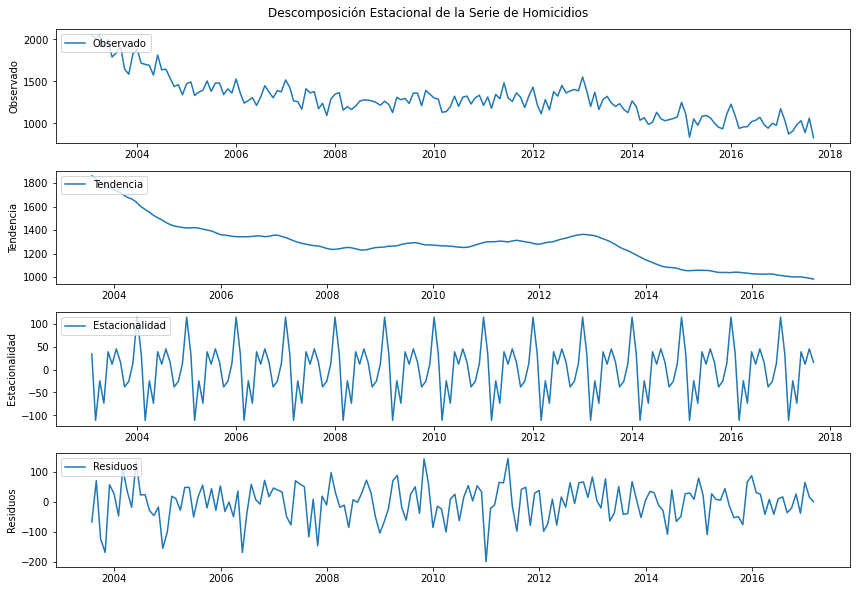

In [9]:
import statsmodels.api as sm

## Se vuelve a cargar la base de homicidios

homicidios_por_fecha = df.groupby('fecha')['n_homicidios'].sum().reset_index()

## Se establece la fecha como indica
homicidios_por_fecha.set_index('fecha', inplace=True)

## Se agrupa por meses
homicidios_por_mes = homicidios_por_fecha.resample('M').sum()

## Se realiza la descomposición estacional con un período de 12 meses (1 año)
result = sm.tsa.seasonal_decompose(homicidios_por_mes['n_homicidios'], model='additive', period=12)


# Se grafican la tendencia, la estacionalidad y los residuos
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')
plt.ylabel('Observado')

plt.subplot(412)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.ylabel('Tendencia')

plt.subplot(413)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.ylabel('Estacionalidad')

plt.subplot(414)
plt.plot(result.resid, label='Residuos')
plt.legend(loc='upper left')
plt.ylabel('Residuos')

plt.tight_layout()
plt.suptitle('Descomposición Estacional de la Serie de Homicidios', y=1.02)
plt.show()

Como se puede observar en las gráficas anteriores en los homicidios observados en la base de datos existe una marcada tendencia a la baja a través del tiempo y una fuerte estacionalidad con los últimos meses del año caracterizados por un incremento marcado en el número de homcidios.

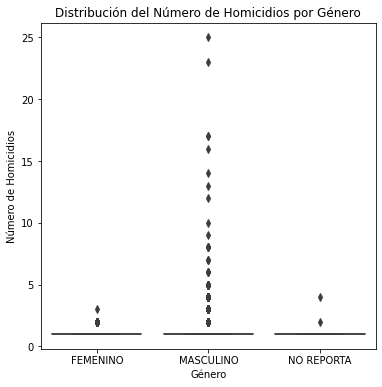

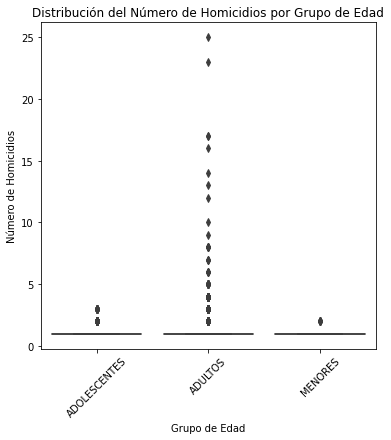

In [12]:

# Se genera un boxplot por genero y número de homicidios para determinar la relación entre ambas variables
plt.figure(figsize=(6, 6))
sns.boxplot(x='genero', y='n_homicidios', data=df)
plt.title('Distribución del Número de Homicidios por Género')
plt.xlabel('Género')
plt.ylabel('Número de Homicidios')
plt.show()

# Se genera un boxplot de grupo de edad por número de homicidios con el mismo objetivo de la gráfica anterior
plt.figure(figsize=(6, 6))
sns.boxplot(x='grupo_edad', y='n_homicidios', data=df)
plt.title('Distribución del Número de Homicidios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
nombre_archivo = 'Distribución del Número de Homicidios por Grupo de Edad'
ruta_archivo = os.path.join(ruta_base, nombre_archivo)
plt.savefig(ruta_archivo, facecolor='white')

Verificando las diferentes caracteristicas de las vbictimas de homicidios se pudo identificar que existe un gran número de datos atípicos espcialmente cuando la victima es un Adulto o del sexo Masculino.

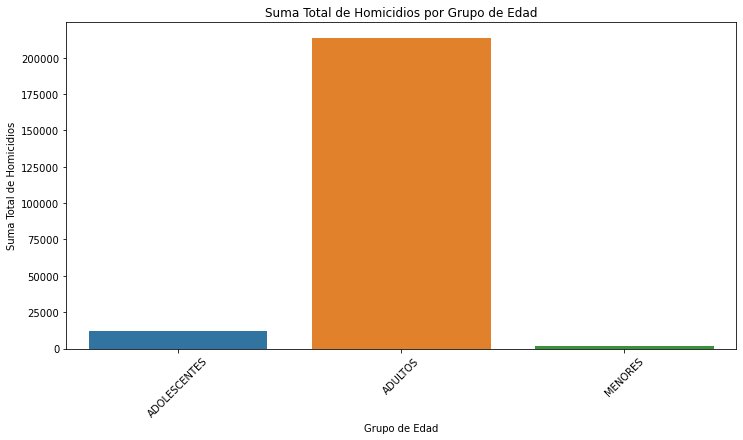

In [13]:
## Se verifica el número de homicidios por Grupo de Edad
# Crear un countplot para el número de homicidios por grupo de edad
plt.figure(figsize=(12, 6))
sns.barplot(x='grupo_edad', y='n_homicidios', data=df, estimator=sum)
plt.title('Suma Total de Homicidios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Suma Total de Homicidios')
plt.xticks(rotation=45)
plt.show()

Como se puede observar en la gráfica de Homicidios por GRupo de Edad la base de datos en su mayoría esta compuesta por Adultos. sin embargo, poblaciones especialmente vulnerables (Menores y Adolescentes) aun son victimas de este crímen por lo que el enfoque del estudio no cambiara.

### Base de Datos del DANE

In [14]:


df_divipola = pd.read_excel(r'..\data\DIVIPOLA_Municipios.xlsx',skiprows=range(1, 10), header=None)
df_divipola.columns = df_divipola.iloc[1]
df_divipola = df_divipola[2:]
columnas = ['codigo', 'Nombre', 'codmpio', 'Nombre', 'Tipo', 'lat', 'lon']
df_divipola.columns = columnas
df_divipola = df_divipola.iloc[:-10]
df_divipola['codmpio'] = df_divipola['codmpio'].astype('int')
df_divipola.head()

,codigo,Nombre,codmpio,Nombre,Tipo,lat,lon
2,05,ANTIOQUIA,5001,MEDELLÍN,Municipio,6.25759,-75.611031
3,05,ANTIOQUIA,5002,ABEJORRAL,Municipio,5.803728,-75.438474
4,05,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,6.627569,-76.085978
5,05,ANTIOQUIA,5021,ALEJANDRÍA,Municipio,6.365534,-75.090597
6,05,ANTIOQUIA,5030,AMAGÁ,Municipio,6.032922,-75.708003


In [16]:
df_divipola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 2 to 1122
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   codigo   1121 non-null   object
 1   Nombre   1121 non-null   object
 2   codmpio  1121 non-null   int32 
 3   Nombre   1121 non-null   object
 4   Tipo     1121 non-null   object
 5   lat      1121 non-null   object
 6   lon      1121 non-null   object
dtypes: int32(1), object(6)
memory usage: 57.1+ KB


A esta base de datos no se le realiza un análisis tan exhaustivo pues se le dara uso únicamente para obtener la información de georreferencia (latitud y longitus) de los diferentes municipios (que ya se encuentran en la base de datos del CEDE) para poder realizar un análisis de puntos de calor. Sin embargo, a pesar de los dicho anteriormente se procedio a revisar que esta base de datos no presentara valores nulos o algún otro tipo de error que pudiera transferirse a la base de datos final.